## Project 2 - Andrew Koren

In this project, we'll be going beyond the laplacian, and try to solve the Poisson Equation for Gravitational Fields.

[Link to Project 2 D2L description](https://d2l.msu.edu/d2l/le/content/2054125/viewContent/16601327/View?ou=2054125)

[Link to Project Rubric](https://d2l.msu.edu/d2l/le/content/2054125/viewContent/16295919/View?ou=2054125)

Typically, gravitation isn't as exciting as electrostatics or steady fluid flow, since we don't have as great of an opportunity to design an interesting system. Not only is gravitational force extremely weak, it is also dependant entirely on mass, making it not only difficult to observe at the microscopic level, but also be much more material-independent. There are no conductors of gravational fields.

I do not mean to say that relativity and the many body problem are no big deal, only that not as much can be done with static gravitational fields as with electrostatic or other fields.  

At a mathematical level, we can still solve Laplace's equation for arbitrary gravitational fields similar to our studies of electrostatics, but for the most part the field in a massless area of space is already simple to describe using superposition of point masses. At scales where gravity is effective (planets, solar systems, galaxies), every mass distribution is effectively a point mass $M$ producing a gravitational field $\vec g$

$$
\vec g = -\frac{GM}{r^2} \hat r
$$

Which, thanks to superpostion, can be used to describe the gravitational field at any point in space. Likewise, gravitational field potential $V_g$ is also quite simple.

$$
\vec g = -\nabla V_g \\
V_g = -\frac{GM}{r}
$$

Due to this simplicity, the Laplace equation isn't really especailly necessary for describing gravitational potential. The code below makes a 2D plot of gravitational potential due to three point masses

[[-5.e+08 -5.e+08]
 [ 0.e+00  5.e+08]
 [ 4.e+08 -6.e+08]]


Text(0.5, 0.92, 'Gravitational Potential (J/kg)')

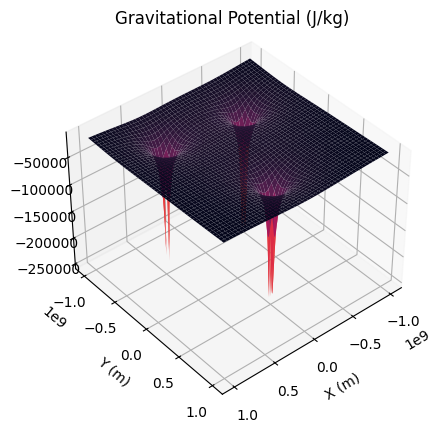

In [21]:
import numpy as np
from numpy import sqrt

import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import cm

G = 6.67e-11
M = 7.35e22 #about the mass of the moon
distance_scale = 1e9 

mass_locations = distance_scale*np.array([[-0.5, -0.5],[0, 0.5],[0.4, -0.6]])
print(mass_locations)


n2 = 1000
x = np.linspace(-distance_scale, distance_scale, n2)
y = np.linspace(-distance_scale, distance_scale, n2)
X, Y = np.meshgrid(x, y)

def potential(X, Y, p0, limit):
    mass, mass_x, mass_y = p0
    r = np.sqrt((X - mass_x) ** 2 + (Y - mass_y) ** 2)
    
    return np.where(r < limit * distance_scale,            \
                    -G * mass / (0.05 * distance_scale),  \
                    -G * mass / r                         \
                    ) #Prevents overflow

sum_potential = np.zeros(X.shape)
for mass in mass_locations:
    sum_potential += potential(X, Y, [M, *mass], limit=0.02)

Z = sum_potential

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the electric potential surface
ax.view_init(40, 50, 0)
ax.plot_surface(X, Y, Z, cmap=cm.rocket_r)

ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
plt.title('Gravitational Potential (J/kg)')

The plot above shows the gravitational potential of three point masses (similar mass to the moon) at a solar-system scale (billions of meters, light seconds). Notice that there is a cutoff as $r\rightarrow 0$, since this would cause the results to blowup. A black hole behaves similarly to a point mass, where the universe itself has a overflow value error and matter condenses into some singularity-like object, but our model doesn't exactly describe Hawking radiation. 

As a non-astrophysics major this is good enough for me for understanding gravitational fields, especially since everything looks like a point charge from far enough away, but this project asks what if we look a little deeper?

Well, in [Dynamics and Astrophysics of Galaxies](https://galaxiesbook.org/chapters/I-01.-Potential-Theory-and-Spherical-Mass-Distributions.html), the poisson equation for gravitational potential is used to verify that solutions to various theorems and mass distributions are accurate. We can try doing this ourselves!

The Poisson equation for gravitational fields, as it comes from Gauss's law \[[see wikipedia](https://en.wikipedia.org/wiki/Laplace%27s_equation)\], is

$$
\nabla^2V_g = 4 \pi G \rho
$$

Let's apply this to a sphere of constant density and show that the resulting potential satisfies the Poisson equation.


## Gravitational Potential for a uniform sphere



Using $V_g = -\frac{GM}{r}$, we have the integral

$$
V_g = -\int_V \frac{G\rho}{r-r'} dV
$$

Rather than going down the rabbit hole of trying to solve this with a 3D integral, we look up the result for a sphere of radius $R$ and constant density $\rho$ in Dynamics of Astrophysics and Galaxies

$$
V_g(r<R) = -2\pi G \rho\left(R^2- \frac{r^2}{3}\right) \\
V_g(r>R) = -\frac{4\pi R^3 }{3}\frac{G\rho}{r} 
$$
Note that these are equivalent for $r=R$. These equatiosn do not blow up as $r\rightarrow 0$, would they be a better alternative to point masses? Well, in the plot above, our cutoff for calcualting potential is at $r<0.02\times 10^9$, so it would really only be worthwhile replacing point masses with this for planets with a radius over twenty million meters. Earth has a radius around six million, and the moon is near one million, so our plot would end up looking about the same.

Here's the plot of this potential

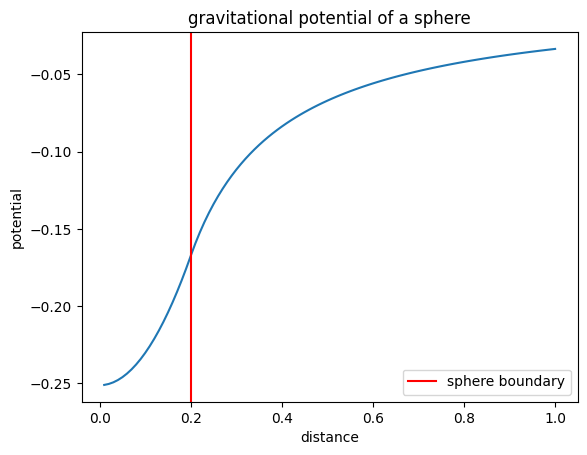

In [77]:
from numpy import pi

def potential(r, params):
    rho, G, R = params
    return np.where(r < R, -2*pi*G*rho *(R**2 - r**2/3), -4/3*pi*R**3*G*rho/r)

r = np.linspace(0.01, 1, 100)
G = 1
R = 0.2
rho = 1
params = [rho, G, R]

plt.plot(r, potential(r, params))
plt.axvline(R, color='red', label = 'sphere boundary')
plt.title('gravitational potential of a sphere')
plt.xlabel('distance')
plt.ylabel('potential')
plt.legend();




Let's apply the poisson distribution for spherical coordinates.

$$
\text{inside: } \nabla^2 V_g =
\frac{1}{r^2} \frac{\partial}{\partial r} \left(r^2 \frac{\partial V_g}{\partial r}  \right) 
=
0 +
2\pi G \rho * \frac{1}{r^2} \frac{\partial}{\partial r} 
\left[r^2 \frac{\partial}{\partial r} \frac{r^2}{3} \right] \\
= 
2\pi G \rho * 2\frac{r^2}{r^2} = 4\pi G \rho


\\
\text{outside: laplacian }\nabla^2 V_g = \frac{1}{r^2} \frac{\partial}{\partial r} \left(r^2 \frac{\partial V_g}{\partial r}  \right) = -\frac{4\pi R^3 G\rho}{3}\left[\frac{1}{r^2} \frac{\partial}{\partial r} \frac{-r^2}{r^2}\right]\\
=-\frac{4\pi R^3 G\rho}{3} * 0 = 0 \\
$$


<!-- Naturally, we'll use spherical coordinates to find potential as a function of radius

$$
dV = r'^2 \sin \theta' dr'd\theta'd\phi' \\
r-r' = \sqrt{r^2+r'^2-2rr'\left[\sin(\theta)\sin(\theta')\cos(\theta-\theta')+ \cos(\theta)\cos(\theta)' \right]} \\
V_g(r) = -G\rho\int_0^{\pi} \int_0^{2\pi}\int_0^R \frac{r'^2 \sin \theta' dr'd\theta'd\phi'}{\sqrt{r^2+r'^2-2rr'\left[\sin(\theta)\sin(\theta')\cos(\theta-\theta')+ \cos(\theta)\cos(\theta)' \right]}} 
$$

Punching this into wolfram gives us the results, but so does google. The result is:

$$
V_g(r<R) = \frac{4\pi r^2 \rho}{3}\frac{}{}\\
V_g(r>R) = 
$$ -->

The code below was used to find the derivatives used

In [57]:
from sympy import Symbol, diff

r = Symbol('r')
vg = r**2/3 - Symbol('R')**2


r_inside = diff(diff(vg, r) * r**2, r) / r**2
r_inside

2

In [59]:
vg = 1/r
r_outside = diff(diff(vg, r) * r**2, r) / r**2
r_outside

0

This is great! We recover the Poisson equations. In class we do a lot more with boundary conditions, separation of variables, etc. but they aren't really necessary for common mass distributions (round balls floating in space). We could analyze interesting mass distributions, such as a planet that was half one density and half another, or see what happens if we found out the hollow earthers were true, and what it would mean physically, but none of these distributions exist in the real world. Using electrostatic systems, we can create statically charged objects, or conductive objects, and actually produce these interesting distributions. 

I think that the best way to understand gravitation is in dynamic systems, not static ones, and as such we would need more tools that the poisson distribution to reveal how these systems work.

<!-- One more worthwhile check is to see if the method of relaxation returns this result, or even a more complex density, but I think that's somewhat boring. Instead, we're going to use method of relaxation on a more interesting problem: rope!

When the method of relaxation was first brought up in class, my mind went to a particular question: can we use it to model how rope hangs between two points, or even how a sheet or other shape hangs down from some boundary conditions? The location of any given point is the average of those nearby, plus some adjustment due to gravity pulling down on the rope. Rather than modeling tension and gravitational force pulling on the rope, can we use gravitational potential to predict how it will rest?

The problem *almost* matches the description of this assignment, close enough that I decided to pair it up with gravitational potential and turn it in.

With any mass which is quite small, we can assume that it's gravitational field is quite weak, and as such does not affect nearby masses. Objects on Earth do not affect the position of the earth very much, and especially not each other. As a result, when  -->